# Cumulative Distribution Transform

This notebook implements the Cumulative Distribution Transform (CDT) and its inverse and showcases an example application of this transformation. 

## CDT Definition: 

Consider two nonzero probability density functions $I_0$ and $I_1$ defined on $X,Y\subset\mathbb{R}$. Considering $I_0$ to be a pre-determined 'reference' density, one can use the following relation, 

\begin{equation}
\int_{inf(Y)}^{f(x)} I_1(\tau) d\tau = \int_{inf(X)}^{x}I_0(\tau)d\tau ~~~~~~~(1)
\end{equation}

to uniquely associate $f_1:X\rightarrow Y$ to the given density $I_1$. We use this relationship to define the \emph{Cumulative Distribution Transform (CDT)} of $I_1$ (denoted as $\hat{I}_1: X \to \mathbb{R}$), with respect to the reference $I_0$:

\begin{align}
\hat{I}_1(x) = \left(  f_1(x) - x \right) \sqrt{I_0(x)}.~~~~~~~(2)
\end{align}

Now let $J_0: X \to [0,1]$ and $J_1: Y \to [0,1]$ be the corresponding cumulative distribution functions for ${I}_0$ and ${I}_1$, that is: $J_0(x) = \int_{\inf(X)}^x I_0(\tau) d\tau$, $J_1(y) = \int_{\inf(Y)}^y I_1(\tau) d\tau$. Equation (1) can then be rewritten as,
\begin{equation}
J_0(x) = J_1(f_1(x)) \Rightarrow f_1(x)=J_1^{-1}(J_0(x)).~~~~~~~(3)
\end{equation}

For continuous cumulative distribution functions $J_0$ and $J_1$, $f_1$ is a continuous and monotonic function. If $f_1$ is differentiable, Equation (3) can be rewritten as
\begin{equation}
I_0(x) = f^{\prime}_1(x) I_1(f_1(x)).~~~~~~~(4)
\end{equation}

## Inverse-CDT Definition: 

The Inverse-CDT of $\hat{I}_1$ is defined as: 
\begin{equation}
I_1(y) = \frac{d }{dy}J_0(f_1^{-1}(y)) = (f_1^{-1})^{\prime} I_0(f^{-1}(y))
\end{equation}
where $f_1^{-1}: Y \to X$ refers to the inverse of $f_1$ (i.e. $f_1^{-1}(f_1(x)) = x$),  $f(x) =  {\hat{I}_1(x)}/{\sqrt{I_0(x)}} + x$, and where $I_1: Y \to \mathbb{R}$ as before. Naturally, the equation above holds for points where $J_0$ and $f$ are differentiable. By the construction above, $f$ will be differentiable except for points where $I_0$ and $I_1$ are discontinuous.

## Now we implement CDT in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import interp
from sklearn.svm import LinearSVC
from matplotlib import colors
%matplotlib inline

### Define CDT and its inverse

In [2]:
def CDT(I0,I1):
    assert I0.shape==I1.shape
    assert not((1.0*I0<0).sum() and (1.0*I1<0).sum())
    I0=I0/I0.sum()
    I1=I1/I1.sum()
    cI0=np.cumsum(I0)
    cI1=np.cumsum(I1)
    x=np.asarray(range(len(I0)))
    xtilde=np.linspace(0,1,len(I0))
    XI0 = interp(xtilde,cI0, x)
    XI1 = interp(xtilde,cI1, x)
    u = interp(x,XI0,XI0-XI1)
    f = x - u
    return u,f
def iCDT(u,I0):
    x=np.asarray(range(len(I0)))
    f=x-u
    fprime=np.gradient(f)
    I1 = interp(x,f, I0/fprime)
    return I1

Define the template distribution $I_0$ to be a uniform distribution.

In [3]:
x=np.asarray(range(100))
I0= np.ones([100])
I0=I0/I0.sum()

Next, we define three classes of signals, where Class $i$, for $i\in\{1,2,3\}$, consist of translated versions of $i$ Gaussian distributions. Sample signals are shown below.

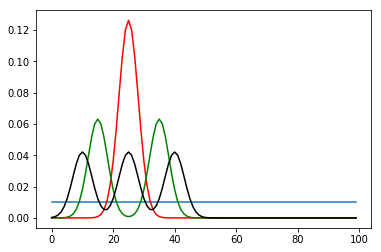

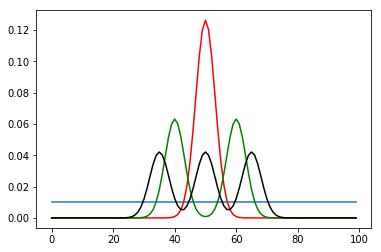

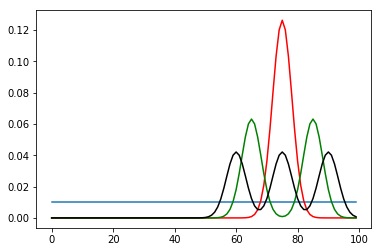

In [4]:
n=1000
I1=[]
I2=[]
I3=[]
eps=1e-7
for i in np.linspace(25,75,n):
    temp=(1/20.0)*np.exp(-((x-i)**2)/20.0)+eps
    I1.append(temp/temp.sum())
    temp=(1/20.0)*np.exp(-((x-i+10)**2)/20.0)+eps+(1/20.0)*np.exp(-((x-i-10)**2)/20.0)
    I2.append(temp/temp.sum())
    temp=(1/20.0)*np.exp(-((x-i+15)**2)/20.0)+eps+(1/20.0)*np.exp(-((x-i-15)**2)/20.0)+(1/20.0)*np.exp(-((x-i)**2)/20.0)
    I3.append(temp/temp.sum())
I1=np.asarray(I1)
I2=np.asarray(I2)
I3=np.asarray(I3)

for i in [0,n/2,n-1]:
    plt.plot(I0) #template
    plt.plot(I1[i,:],'r')#class 1
    plt.plot(I2[i,:],'g')#class 2
    plt.plot(I3[i,:],'k')#class 3
    plt.show()

Calculate the CDT of the signals defined above.

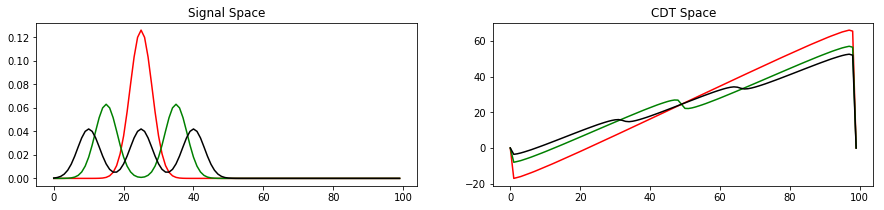

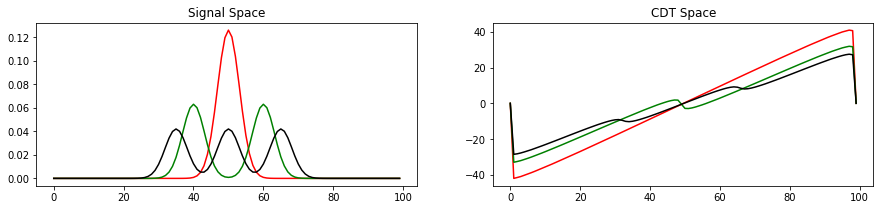

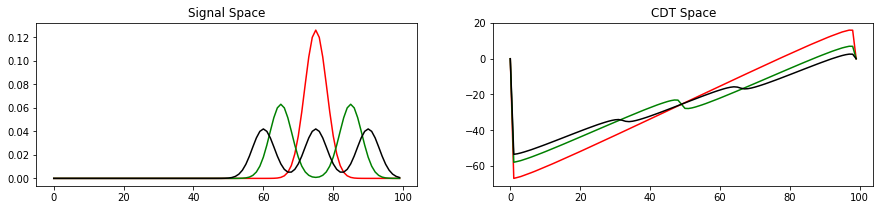

In [5]:
u1=[]
u2=[]
u3=[]
for i in range(n):
    u1_,f1_=CDT(I0,I1[i,:])
    u2_,f2_=CDT(I0,I2[i,:])
    u3_,f3_=CDT(I0,I3[i,:])
    u1.append(u1_)
    u2.append(u2_)
    u3.append(u3_)
u1=np.asarray(u1)
u2=np.asarray(u2)
u3=np.asarray(u3)    


for i in [0,n/2,n-1]:
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(15,3))
    ax1.plot(I1[i,:],'r')#class 1
    ax1.set_title('Signal Space')
    ax2.plot(u1[i,:],'r')#class 1
    ax2.set_title('CDT Space')
    ax1.plot(I2[i,:],'g')#class 2
    ax2.plot(u2[i,:],'g')#class 2
    ax1.plot(I3[i,:],'k')#class 3
    ax2.plot(u3[i,:],'k')#class 3    
    plt.show()

Now we test the inverse CDT: 

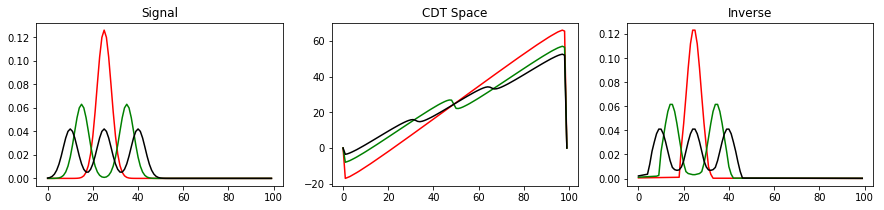

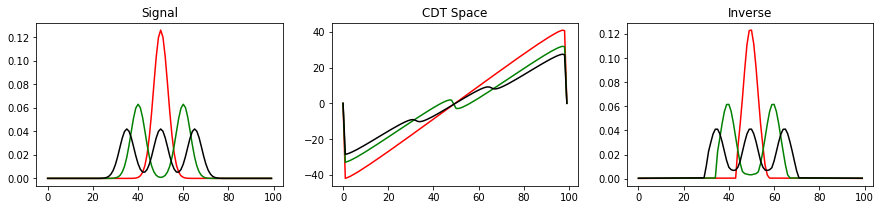

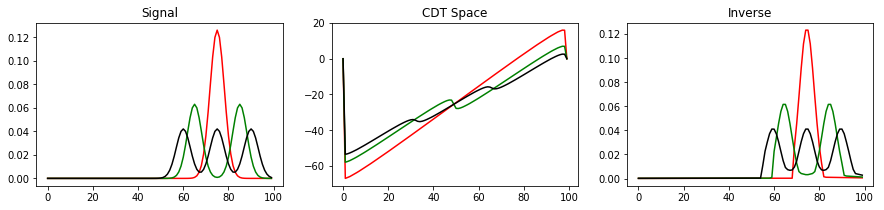

In [6]:
for i in [0,n/2,n-1]:
    fig,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(15,3))
    ax1.plot(I1[i,:],'r')#class 1
    ax1.set_title('Signal')
    ax2.plot(u1[i,:],'r')#class 1
    ax2.set_title('CDT Space')
    ax3.plot(iCDT(u1[i,:],I0),'r')#class 1
    ax3.set_title('Inverse')
    ax1.plot(I2[i,:],'g')#class 2
    ax2.plot(u2[i,:],'g')#class 2
    ax3.plot(iCDT(u2[i,:],I0),'g')#class 2
    ax1.plot(I3[i,:],'k')#class 3
    ax2.plot(u3[i,:],'k')#class 3    
    ax3.plot(iCDT(u3[i,:],I0),'k')#class 3
    plt.show()

Finally we do linear classification in the Signal Space and in the CDT space. We use LDA for visualization. 

In [7]:
# 
lda=LinearDiscriminantAnalysis(n_components=2)

X=np.concatenate((I1,I2,I3),0)         #Combine the signals into a features vector X
Xhat=np.concatenate((u1,u2,u3),0)      #Combine the transformed signals into a features vector Xhat
label=np.concatenate((np.zeros(n,),np.ones(n,),-1*np.ones(n,))) # Define the labels as -1,0,1 for the three classes

/Users/skolouri/Documents/VirtualEnv/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


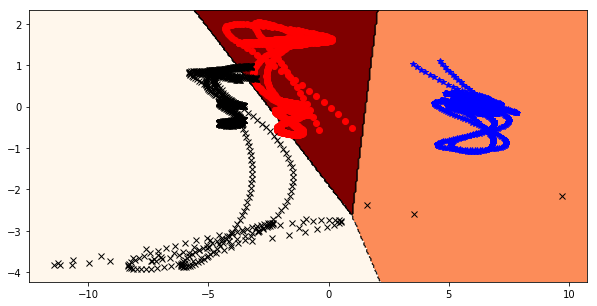

In [8]:
# Apply LDA and show classification boundaries in Signal Space
Xlda=lda.fit_transform(X,label)
svm=LinearSVC()
svm.fit(Xlda,label)

plt.figure(figsize=(10,5))
plt.plot(Xlda[:n,0],Xlda[:n,1],'b*')
plt.plot(Xlda[n:2*n,0],Xlda[n:2*n,1],'ro')
plt.plot(Xlda[2*n:,0],Xlda[2*n:,1],'kx')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z,cmap='OrRd')
plt.contour(xx, yy, Z, linewidths=.5, colors='k')
plt.show()

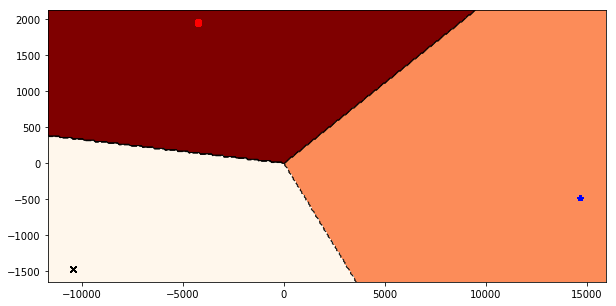

In [9]:
# Apply LDA and show classification boundaries in the transform Space
Xhatlda=lda.fit_transform(Xhat,label)
svm=LinearSVC()
svm.fit(Xhatlda,label)

plt.figure(figsize=(10,5))
plt.plot(Xhatlda[:n,0],Xhatlda[:n,1],'b*')
plt.plot(Xhatlda[n:2*n,0],Xhatlda[n:2*n,1],'ro')
plt.plot(Xhatlda[2*n:,0],Xhatlda[2*n:,1],'kx')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z,cmap='OrRd')
plt.contour(xx, yy, Z, linewidths=.5, colors='k')
plt.show()